# Word frequencies, overall and by time period

In [34]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
%matplotlib inline

In [39]:
import operator

def get_word_frequencies(cleaned_texts):
    
    word_use = {}
    for text in cleaned_texts:
        for word in text:
            if word not in word_use:
                word_use[word] = 0
            if word in word_use:
                word_use[word] += 1
    
    total_words = sum(word_use.values())
    
    sorted_words = sorted(word_use.items(), key=operator.itemgetter(1))
    sorted_words.reverse()
    
#     print("Total number of documents: " + str(len(cleaned_texts)))
#     print("Average length of text: " + str(np.mean([len(text) for text in cleaned_texts])))
#     print(" ")
#     print("The top 20 most used words:")
#     print(sorted_words[0:20])
#     print(" ")

    return word_use

In [30]:
def get_relative_word_frequencies(cleaned_texts, target_words = None):
    
    word_freq_dict = get_word_frequencies(cleaned_texts)
    
    freqs = [freq for freq in word_freq_dict.values()]
    
    word_rel_freq_dict = {}
    
    if target_words == None:
        for word in word_freq_dict.keys():
            percentile = 100*sum(i <= word_freq_dict[word] for i in freqs)/len(freqs)
            word_rel_freq_dict[word] = percentile
    else:
        for word in target_words:
            if word in word_freq_dict:
                percentile = 100*sum(i <= word_freq_dict[word] for i in freqs)/len(freqs)
            else: percentile = 0
            word_rel_freq_dict[word] = percentile
            
    return word_rel_freq_dict

In [31]:
def plot_relative_word_freq(word_freq_dict, target_words):
    
    fig, ax = plt.subplots(1, 2, figsize = (12, 5))
    
    ax[0].hist([v for v in word_freq_dict.values()], bins = 100, log = True)
    ax[0].set_xlabel('word frequency')
    ax[0].set_ylabel('number of words')
    
    freqs = [freq for freq in word_freq_dict.values()]
    
    max_freq = max(freqs)
    min_freq = min(freqs)
    
    for word in target_words:
        if word in word_freq_dict:
            ax[0].plot([word_freq_dict[word], word_freq_dict[word]], [0, max_freq], c='r')
            
    percentiles = [100*sum(i <= word_freq_dict[word] for i in freqs)/len(freqs) if word in word_freq_dict else 0 for word in target_words]
    
    y = np.arange(len(target_words))
    bars = ax[1].barh(target_words, percentiles)
    ax[1].bar_label(bars, labels = [str(word_freq_dict[word]) if word in word_freq_dict else '0' for word in target_words])
    ax[1].set_xlabel('word frequency percentile')
    
    fig.set_tight_layout(True)

    return fig, ax

In [32]:
def plot_relative_word_freq_bins(word_rel_freq_dicts, target_words, x_values, x_labels, change_cutoff, axis_low_cutoff):
    
    fig, ax = plt.subplots()
    axis_hi_cutoff = 0
    
    for word in target_words:
        my_freqs = []
        for wfd in word_rel_freq_dicts:
            if word in wfd:
                my_freqs.append(wfd[word])
            else: my_freqs.append(0)
        y_values = np.array(my_freqs)#1/np.array([f if f>0 else -1 for f in my_freqs])
        
        if abs(max(my_freqs) - min(my_freqs)) > change_cutoff and min(my_freqs) > axis_low_cutoff:
            ax.plot(x_labels, y_values)
            ax.text(x_values[-1] + 0.1, y_values[-1], word)
            if axis_hi_cutoff < max(my_freqs):
                axis_hi_cutoff = max(my_freqs)
            print(axis_hi_cutoff)
            
        ax.set_ylim(axis_low_cutoff, axis_hi_cutoff)

    return fig, ax

## Word frequencies by time period

In [5]:
import uv
from importlib import reload

/Users/cdeljunco/.pyenv/versions/3.9.7/envs/nlp/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [26]:
reload(uv)

<module 'uv' from '/Users/cdeljunco/2-Work/Research/AI-Scifi/Code/UtopianVectors/uv.py'>

In [23]:
book_info_eutopia, book_info_dystopia = uv.load_clean_metadata()

In [24]:
#cln_txts_eu_dict, cln_txts_dys_dict = uv.get_text_dicts()
cln_txts_eu_dict = uv.get_lemmatized_eutopia_text_dicts()

note: does not include scanned pdfs


In [27]:
lemm_search_words = uv.lemmatize_search_words()
print(lemm_search_words)

['justice', 'man', 'woman', 'artificial_intelligence', 'factory', 'labour', 'state', 'economy', 'food', 'freedom', 'health', 'time', 'home', 'house', 'government', 'immigrant', 'safety', 'police', 'crime', 'equality', 'planet', 'space', 'earth', 'technology', 'machinery', 'machine', 'cyber', 'computer', 'digital', 'industrial', 'future', 'automation', 'robot', 'science', 'network', 'interface', 'virtual', 'military', 'engineer', 'system']


{'Early': [1700, 1850], 'Romantic/gothic': [1850, 1900], 'WWI/WW2': [1900, 1946], 'Cold war': [1946, 1991], 'Contemporary': [1991, 2022]}
all time
Total number of documents: 721
Average length of text: 29994.818307905687
 
The top 20 most used words:
[('say', 156978), ('�', 154881), ('man', 144947), ('know', 100962), ('come', 98506), ('time', 97036), ('like', 88099), ('people', 75726), ('great', 74125), ('look', 73743), ('think', 69780), ('good', 65948), ('go', 65208), ('day', 62746), ('life', 62023), ('work', 61896), ('o', 60061), ('thing', 58952), ('way', 57853), ('world', 57813)]
 
Early
texts in date range: 50
Total number of documents: 50
Average length of text: 29237.88
 
The top 20 most used words:
[('man', 10652), ('great', 6948), ('time', 5623), ('nature', 4563), ('form', 4221), ('say', 4001), ('know', 3958), ('good', 3898), ('thing', 3858), ('mind', 3770), ('day', 3737), ('find', 3581), ('like', 3538), ('world', 3494), ('power', 3453), ('country', 3310), ('state', 3269), ('li

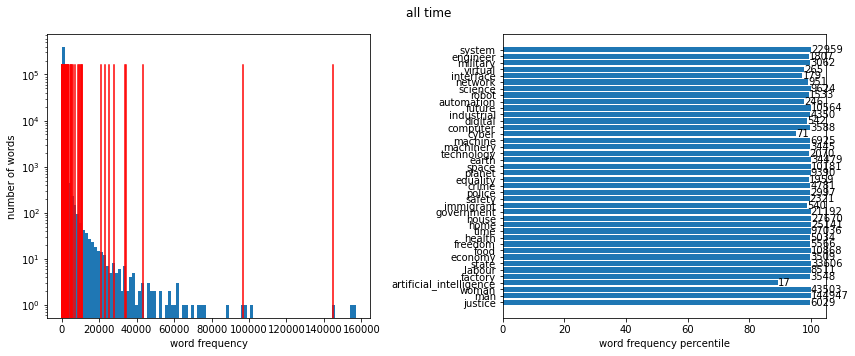

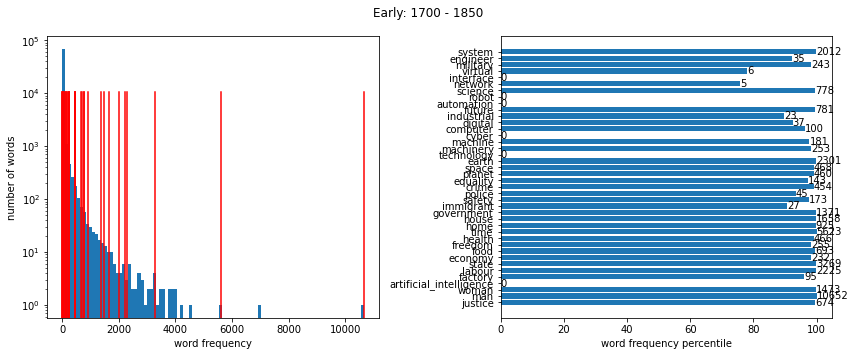

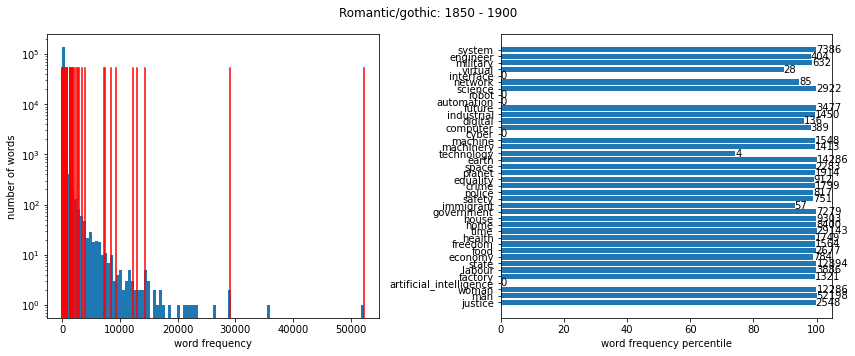

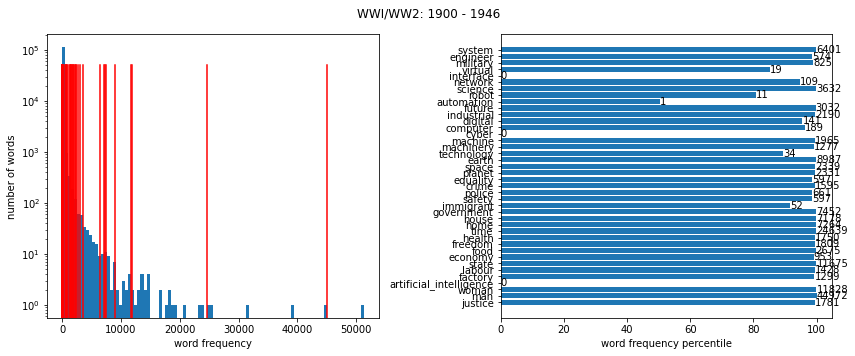

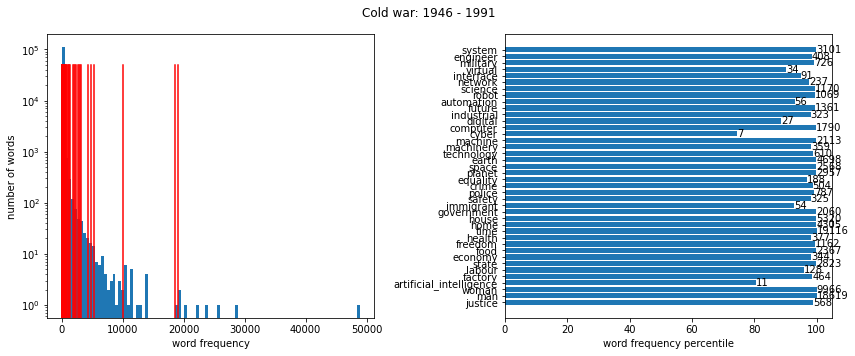

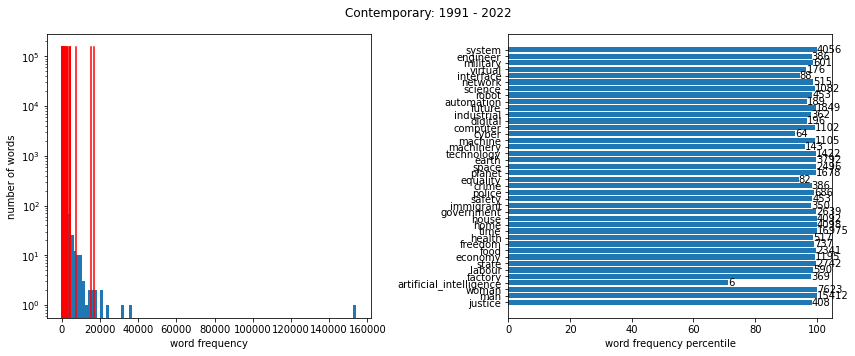

In [36]:
#define time periods -- centuries from 1500 - 1800, decades from 1800 - 2021. Not principled, just based on 
#where we have data coverage. feel free to change/experiment

eras = {'Early':[1700, 1850], 'Romantic/gothic':[1850, 1900], 'WWI/WW2':[1900, 1946], 
        'Cold war':[1946, 1991], 'Contemporary':[1991, 2022]}
print(eras)

print("all time")
word_freq = get_word_frequencies(uv.get_all_texts(cln_txts_eu_dict))
fig, ax = plot_relative_word_freq(word_freq, lemm_search_words)
plt.suptitle("all time")

all_book_ids = []

for era in eras.keys():
    print(era)
    word_freq = get_word_frequencies(uv.get_texts_year_range(eras[era][0], eras[era][1], 
                                                             book_info = book_info_eutopia, text_dict = cln_txts_eu_dict))
    fig, ax = plot_relative_word_freq(word_freq, lemm_search_words)
    plt.suptitle(era + ': ' + str(eras[era][0]) + ' - ' + str(eras[era][1]))

Early
texts in date range: 50
Romantic/gothic
texts in date range: 197
WWI/WW2
texts in date range: 197
Cold war
texts in date range: 129
Contemporary
texts in date range: 138
100.0
100.0
100.0
100.0
100.0
100.0
100.0
99.71522985019234
99.71522985019234
99.78827823252188
99.78827823252188
99.78827823252188
99.95289516318971
99.95289516318971
99.95289516318971
99.95289516318971
99.95289516318971
99.95289516318971
99.95289516318971
99.95289516318971
99.36194357411517
99.93596402601284
99.93596402601284
99.93596402601284
99.93596402601284
99.93596402601284
99.93596402601284
99.93596402601284
99.93596402601284
99.93596402601284
99.93596402601284
99.93596402601284


(75.0, 100.0)

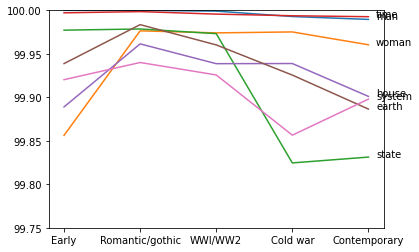

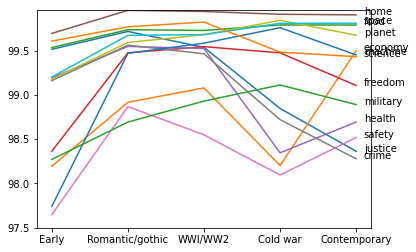

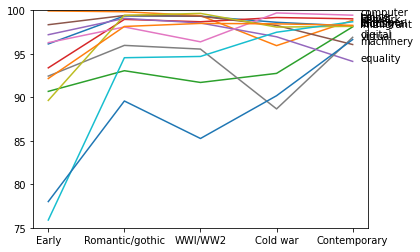

In [40]:
time_dicts = []

for era in eras.keys():
    print(era)
    word_freq = get_relative_word_frequencies(uv.get_texts_year_range(eras[era][0], eras[era][1], book_info = book_info_eutopia, text_dict = cln_txts_eu_dict),
                                                                         target_words = lemm_search_words)
    time_dicts.append(word_freq)

fig, ax = plot_relative_word_freq_bins(time_dicts, lemm_search_words, np.arange(len(time_dicts)), 
                                       [k for k in eras.keys()], 0, 99.75)
#ax.set_ylim(99.75, 100)

fig2, ax2 = plot_relative_word_freq_bins(time_dicts, lemm_search_words, np.arange(len(time_dicts)), 
                                       [k for k in eras.keys()], 0.25, 97.5)
#ax2.set_ylim(97.5, 99.75)

fig3, ax3 = plot_relative_word_freq_bins(time_dicts, lemm_search_words, np.arange(len(time_dicts)), 
                                       [k for k in eras.keys()], 2.5, 10)
ax3.set_ylim(75, 100)